In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Load Datas

In [3]:
df = pd.read_csv('sdn_ml.csv')

df

,temperature,label,delay
0,19.1652,1.0,126.251634
1,19.1750,1.0,126.251634
2,19.1456,1.0,126.251634
3,19.1652,1.0,126.251634
4,19.1652,1.0,126.251634
...,...,...,...
3144,18.1558,0.0,9235.036163
3145,18.1656,0.0,9235.036163
3146,18.1558,0.0,9235.036163
3147,18.1656,0.0,9235.036163


# Separing dataset

In [4]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]


# Normalizing

In [5]:
from sklearn.preprocessing import StandardScaler
f_columns = ['temperature','label']

In [6]:

scaler1 = StandardScaler().fit(train)
scaler2 = StandardScaler().fit(train)

scaler1= scaler1.fit(train[f_columns].to_numpy())
scaler2 = scaler2.fit(train[['delay']])

train.loc[:,f_columns] = scaler1.transform(train[f_columns].to_numpy())
train['delay'] = scaler2.transform(train[['delay']])





C:\Users\silva\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-6-ed2d138871be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,f_columns] = scaler1.transform(train[f_columns].to_numpy())
<ipython-input-6-ed2d138871be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [7]:
scaler3 = StandardScaler().fit(test)
scaler4 = StandardScaler().fit(test)
scaler3 = scaler3.fit(test[f_columns].to_numpy())
scaler4 = scaler4.fit(test[['delay']])

test.loc[:,f_columns] = scaler3.transform(test[f_columns].to_numpy())
test['delay'] = scaler4.transform(test[['delay']])

C:\Users\silva\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-7-1fcedf14ad57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,f_columns] = scaler3.transform(test[f_columns].to_numpy())
<ipython-input-7-1fcedf14ad57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [8]:
test

,temperature,label,delay
2834,1.548949,0.0,0.0
2835,1.548949,0.0,0.0
2836,1.451414,0.0,0.0
2837,1.451414,0.0,0.0
2838,1.500182,0.0,0.0
...,...,...,...
3144,-1.913545,0.0,0.0
3145,-1.864777,0.0,0.0
3146,-1.913545,0.0,0.0
3147,-1.864777,0.0,0.0


In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i: (i+time_steps), 0:2].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [10]:
TIME_STEPS = 1

X_train,Y_train = create_dataset(train, train.delay, time_steps=TIME_STEPS)
X_test,Y_test = create_dataset(test, test.delay, time_steps=TIME_STEPS)

In [11]:
#deoeting label
# X_train.drop('label', axis=1, inplace=True)
# X_test.drop('label', axis=1, inplace=True)


In [12]:
Y_train

array([-1.24042754, -1.24042754, -1.24042754, ...,  1.55672485,
        1.55672485,  1.55672485])

In [13]:
print(X_train.shape[0]*0.9/64, Y_train.shape)

38.446875 (2734,)


# Training

In [14]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=40,
            input_shape=(X_train.shape[1],X_train.shape[2])
        )
    ))

model.add(keras.layers.Dense(units=40))
model.add(keras.layers.Dense(units=40))
model.add(keras.layers.Dense(units=40))
model.add(keras.layers.Dense(units=40))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
#model.add(tf.keras.layers.ThresholdedReLU(theta=0.6))

# Compilation

In [15]:
loss ="mse"
optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
metrics=["accuracy"]

In [16]:
model.compile(loss=loss, optimizer=optim, 
             metrics=metrics
             )

In [17]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [18]:
history = model.fit(
    X_train, Y_train, 
    epochs=100, 
    batch_size= 64,
    validation_split=0.25,
    shuffle=False,
#     callbacks=[tensorboard_callback]
)

Epoch 1/10
33/33 [==============================] - 22s 176ms/step - loss: 0.5606 - accuracy: 0.0000e+00 - val_loss: 2.6768 - val_accuracy: 0.0000e+00
Epoch 2/10
33/33 [==============================] - 2s 55ms/step - loss: 0.4467 - accuracy: 0.0000e+00 - val_loss: 2.8890 - val_accuracy: 0.0000e+00
Epoch 3/10
33/33 [==============================] - 2s 55ms/step - loss: 0.3889 - accuracy: 0.0000e+00 - val_loss: 3.0831 - val_accuracy: 0.0000e+00
Epoch 4/10
33/33 [==============================] - 2s 54ms/step - loss: 0.3484 - accuracy: 0.0000e+00 - val_loss: 3.2532 - val_accuracy: 0.0000e+00
Epoch 5/10
33/33 [==============================] - 2s 59ms/step - loss: 0.3284 - accuracy: 0.0000e+00 - val_loss: 3.3800 - val_accuracy: 0.0000e+00
Epoch 6/10
33/33 [==============================] - 2s 60ms/step - loss: 0.3050 - accuracy: 0.0000e+00 - val_loss: 3.4680 - val_accuracy: 0.0000e+00
Epoch 7/10
33/33 [==============================] - 2s 58ms/step - loss: 0.2948 - accuracy: 0.0000e+00 -

In [19]:
model.save('models/5_layers/40_neurons/m1')

INFO:tensorflow:Assets written to: models/5_layers/40_neurons/m1\assets


INFO:tensorflow:Assets written to: models/5_layers/40_neurons/m1\assets


In [20]:
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='validation')
# plt.legend();

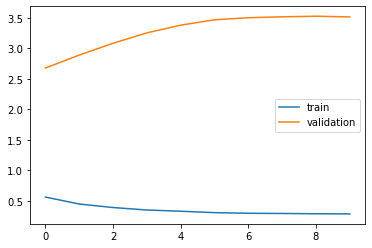

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [22]:
y_pred = model.predict(X_test)

In [23]:
Y_train.reshape(1,-1).shape

(1, 2734)

In [24]:
y_train_inv = scaler2.inverse_transform(Y_train.reshape(1,-1)) 
y_test_inv = scaler4.inverse_transform(Y_test.reshape(1,-1))
y_pred_inv = scaler2.inverse_transform(y_pred)

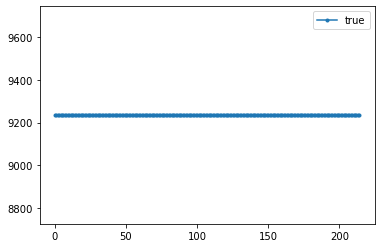

In [25]:

# plt.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.legend();

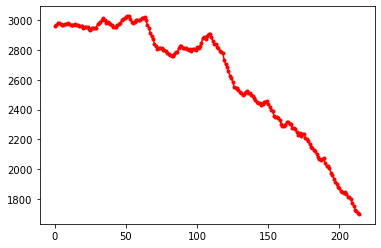

In [26]:
plt.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')

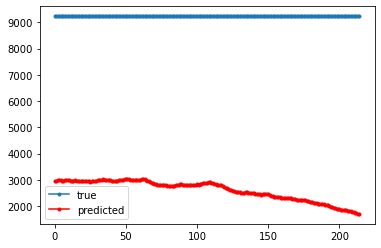

In [27]:
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')

plt.legend();

In [28]:
y_pred_inv

array([[2962.446 ],
       [2966.5283],
       [2980.186 ],
       [2980.263 ],
       [2974.2053],
       [2969.7256],
       [2970.8562],
       [2977.923 ],
       [2975.6792],
       [2981.2966],
       [2973.1885],
       [2967.7798],
       [2965.626 ],
       [2970.0576],
       [2973.8147],
       [2970.77  ],
       [2971.6797],
       [2962.8853],
       [2961.7695],
       [2959.614 ],
       [2950.3557],
       [2956.322 ],
       [2955.5781],
       [2952.403 ],
       [2944.6191],
       [2932.8013],
       [2945.7368],
       [2946.8252],
       [2949.5637],
       [2951.1633],
       [2973.0437],
       [2980.917 ],
       [2986.1536],
       [2998.8835],
       [3015.0022],
       [3000.1533],
       [2982.968 ],
       [2988.8462],
       [2982.7644],
       [2978.3972],
       [2969.4731],
       [2956.9463],
       [2954.557 ],
       [2951.68  ],
       [2966.8772],
       [2975.7725],
       [2983.1782],
       [2999.3406],
       [3007.466 ],
       [3012.8635],


In [29]:
y_test_inv

array([[9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616261, 9235.03616261,
        9235.03616261, 9235.03616261, 9235.03616